### Kelompok 7 Kecerdasan Buatan - IF A2 2020
#### <li>2009106013 Yanuar Satria Gotama</li>
#### <li>2009106016 Satria Bagus Eka Chandra</li>
#### <li>2009106022 Gempar Panggih Dwi Putra</li>
#### Project - Klasifikasi Buah-buahan
### Job Desk
#### <li>Data Colleting - Satria</li>
#### <li>Data Preprocessing - Satria</li>
#### <li>Data Analysis and Visualization -  Yanuar</li>
#### <li>Data Modeling - Gempar</li>
#### <li>Evaluasi - Satria, Gempar</li>
#### Link Dataset - https://www.kaggle.com/datasets/sshikamaru/fruit-recognition
#### Link Model - https://drive.google.com/file/d/12N0bVPwk1CvCFFJp2TjhcPX0tz2XqDiB/view?usp=share_link
#### Keterangan : Karena file model terlalu besar jadi kami memberikan link google drive

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pathlib
import PIL
import matplotlib.pyplot as plt

### Preprocessing dan Data Collecting

Disini kami menggunakan dataset buah-buahan dari Kaagle yang merupakan tipe Dataset citra atau gambar. Terdapat 32 Class atau jenis buah-buahan dalam dataset ini. Dengan dataset ini kami akan membuat sebuah projek deep learning yang memiliki fungsi mengklasifikasi buah berdasarkan gambar.

In [2]:
trainDirectory = 'fruit-recognition/train/train'
imageHeight = 100
imageWidth = 100
inputShape = (imageHeight, imageWidth, 3)

Dalam tahap preprocessing dan data collecting kami menggunakan sebuah fungsi pada tensorflow untuk mempermudah yaitu ImageDataGenerator.

In [3]:
imageDataGenerator = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

testDataGenerator = ImageDataGenerator(rescale=1./255)

trainGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

validGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


### Data Visualization

#### Preview Gambar

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (120,120)
BASE_PATH = 'fruit-recognition/'

train_path = 'fruit-recognition/train/train/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 16854 images belonging to 33 classes.


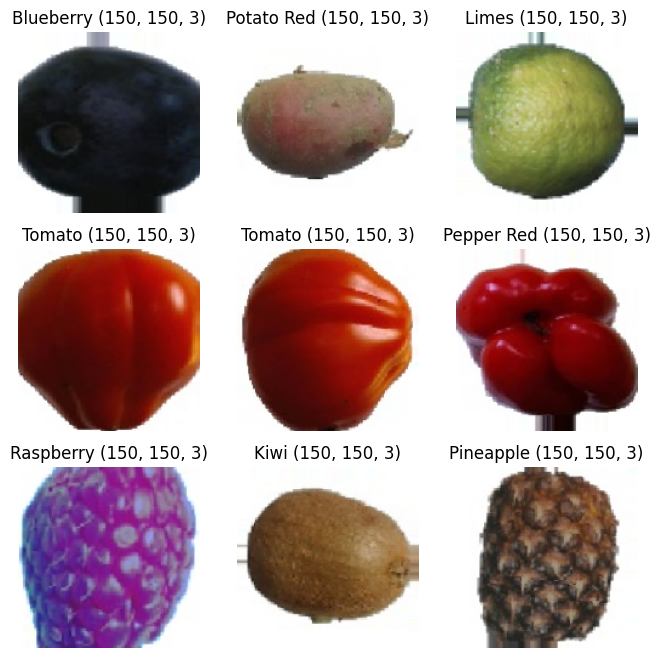

In [5]:
class_names = os.listdir(train_path)

image, label = train_generator.next()

plt.figure(figsize=(8,8))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(f'{class_names[np.argmax(label[i])]} {image[i].shape}')
  plt.axis("off")

#### Metadata

In [6]:
def getsize():
    image_count = 0
    data_dir = pathlib.Path(train_path)
    image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count

In [7]:
print("Datasets      :  Fruit Dataset")
print("Image Feature : ", image.shape)
print("Label Feature : ", class_names)
print("Image Count   : ", getsize())

Datasets      :  Fruit Dataset
Image Feature :  (32, 150, 150, 3)
Label Feature :  ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
Image Count   :  16854


#### Class Distribution

In [8]:
class_size = []
for i in os.listdir(train_path):
    image_count = 0
    data_dir = pathlib.Path(train_path + '/'+ i)
    count = len(os.listdir(data_dir))
    class_size.append(count)

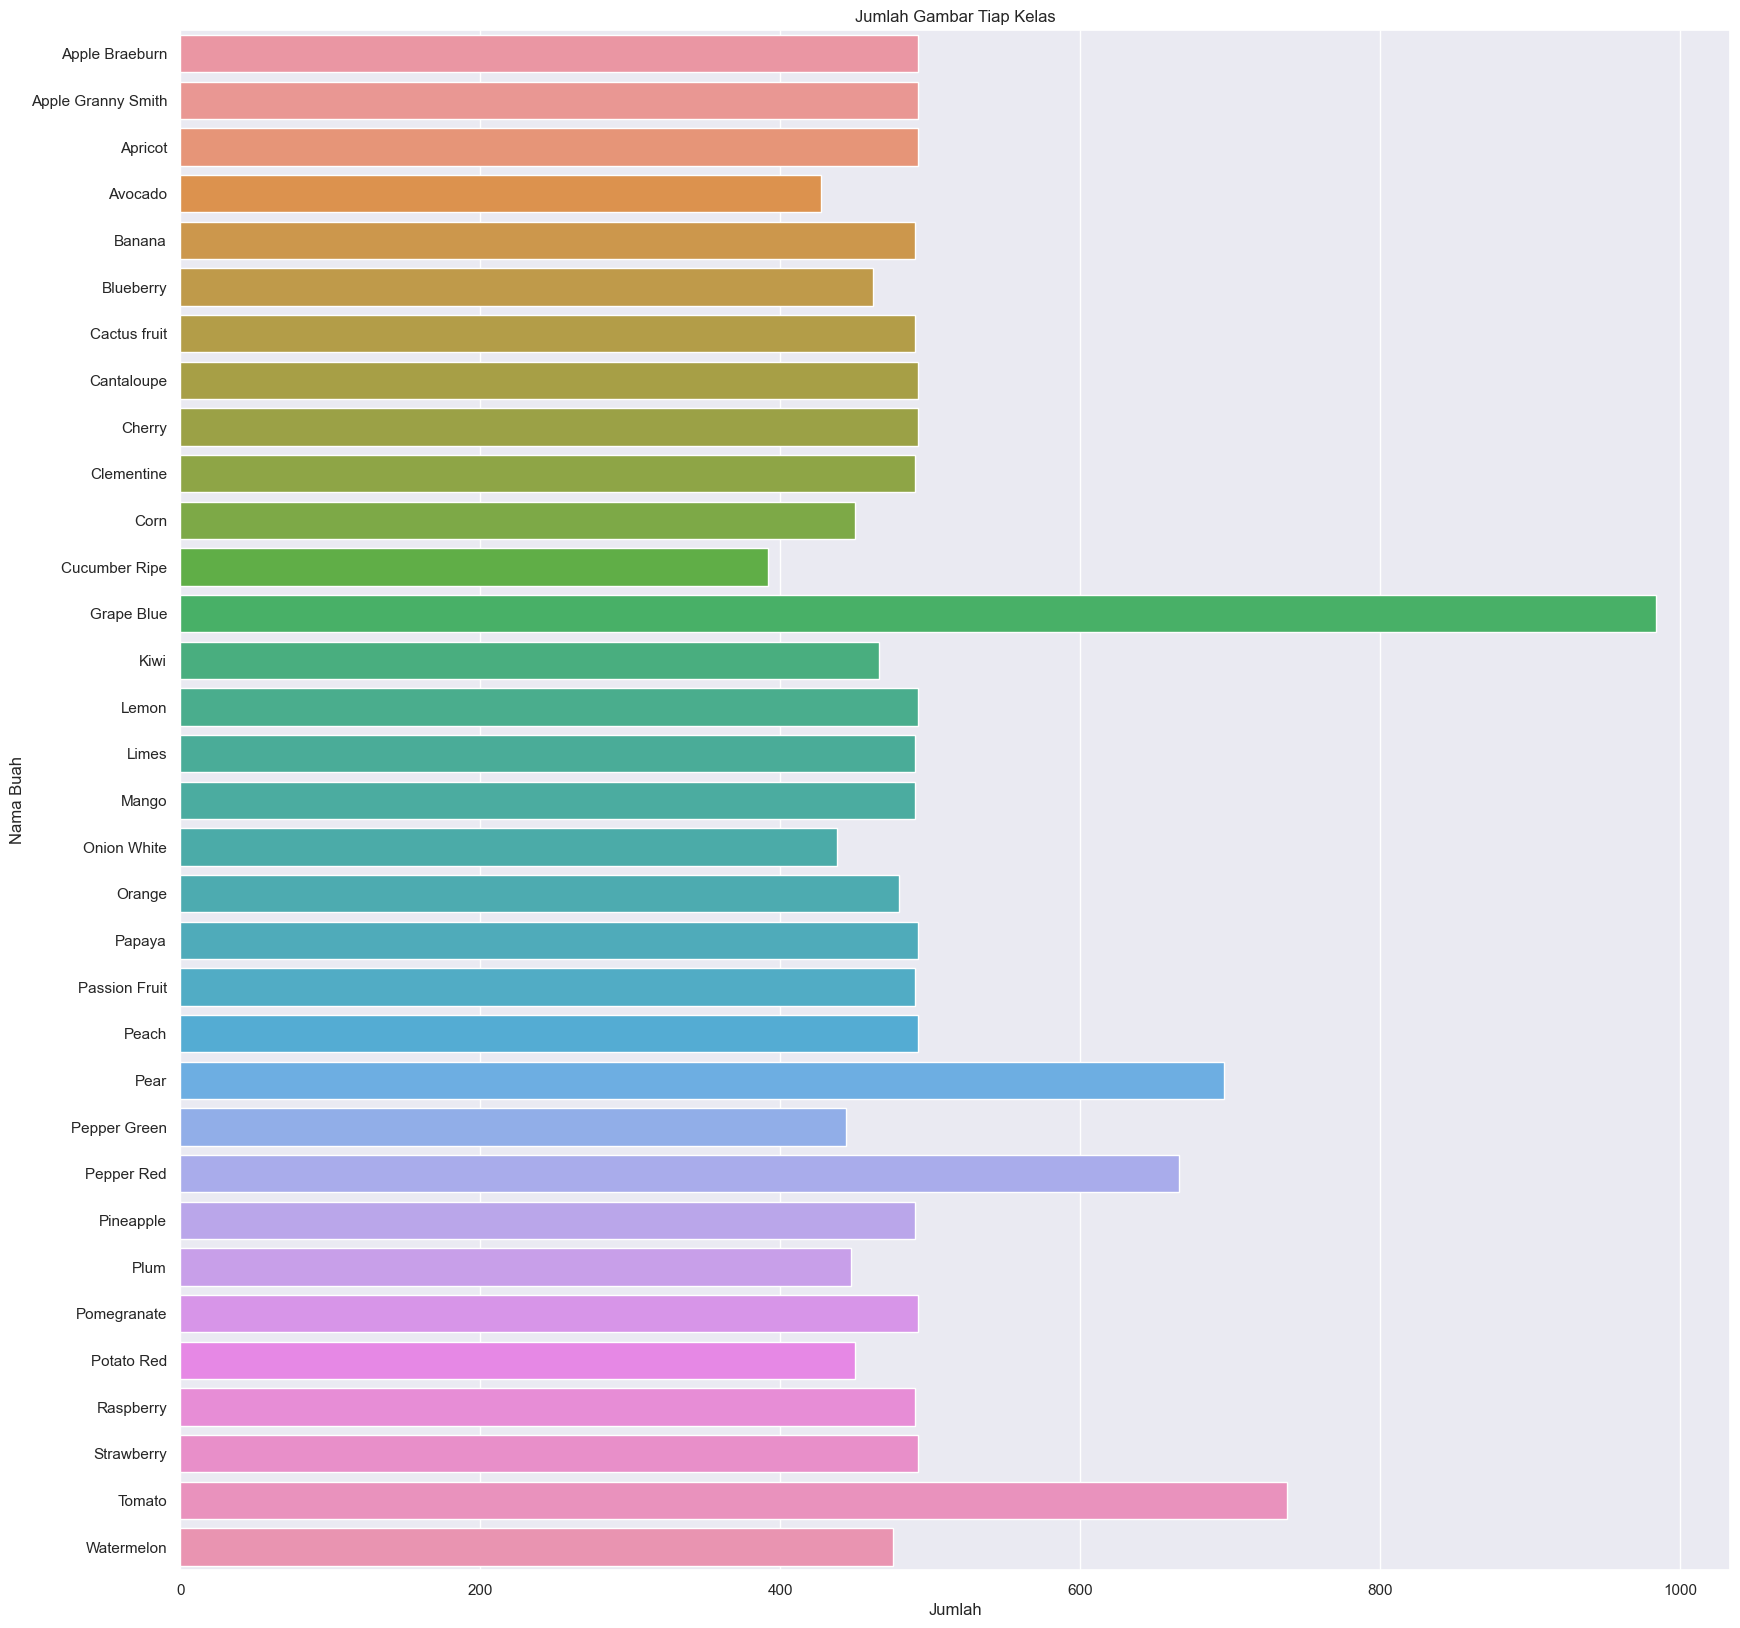

In [9]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.barplot(y=class_names,x=class_size,orient="h")
plt.title('Jumlah Gambar Tiap Kelas')
plt.xlabel('Jumlah')
plt.ylabel('Nama Buah')
plt.show()

### CNN Model

#### Buat Model

Untuk modelling dari projek deep learning ini kami menggunakan algoritma CNN atau biasa disebut Convolutional Neural Network.

In [10]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', padding='Same', input_shape=inputShape))
model.add(Conv2D(64, (5, 5), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(33, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                        

#### Latih Model

Dalam melakukan model fit kami membuat model ini hanya berjalan sebanyak 10 epoch atau 10 iterasi untuk menemukan hasil loss yang kecil serta hasil akurasi tinggi.

In [11]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)
history = model.fit(trainGenerator, validation_data=validGenerator,
                   steps_per_epoch=trainGenerator.n//trainGenerator.batch_size,
                    validation_steps=validGenerator.n//validGenerator.batch_size,
                    callbacks=[early],
                   epochs=10)

Epoch 1/10
421/421 [==============================] - 750s 2s/step - loss: 2.2266 - accuracy: 0.3242 - val_loss: 1.0053 - val_accuracy: 0.7405
Epoch 2/10
421/421 [==============================] - 722s 2s/step - loss: 0.9495 - accuracy: 0.6871 - val_loss: 0.2945 - val_accuracy: 0.9122
Epoch 3/10
421/421 [==============================] - 720s 2s/step - loss: 0.5430 - accuracy: 0.8196 - val_loss: 0.2973 - val_accuracy: 0.9152
Epoch 4/10
421/421 [==============================] - 701s 2s/step - loss: 0.3841 - accuracy: 0.8701 - val_loss: 0.1737 - val_accuracy: 0.9438
Epoch 5/10
421/421 [==============================] - 702s 2s/step - loss: 0.3045 - accuracy: 0.8984 - val_loss: 0.0909 - val_accuracy: 0.9729
Epoch 6/10
421/421 [==============================] - 701s 2s/step - loss: 0.2427 - accuracy: 0.9175 - val_loss: 0.0595 - val_accuracy: 0.9821
Epoch 7/10
421/421 [==============================] - 699s 2s/step - loss: 0.2181 - accuracy: 0.9302 - val_loss: 0.0384 - val_accuracy: 0.9914

##### Save Model

In [12]:
model.save('model_CNN.h5')

#### Load Model

In [14]:
model = load_model('model_CNN.h5')
fruitMap = dict([(v, k) for k, v in trainGenerator.class_indices.items()])
fruitMap

{0: 'Apple Braeburn',
 1: 'Apple Granny Smith',
 2: 'Apricot',
 3: 'Avocado',
 4: 'Banana',
 5: 'Blueberry',
 6: 'Cactus fruit',
 7: 'Cantaloupe',
 8: 'Cherry',
 9: 'Clementine',
 10: 'Corn',
 11: 'Cucumber Ripe',
 12: 'Grape Blue',
 13: 'Kiwi',
 14: 'Lemon',
 15: 'Limes',
 16: 'Mango',
 17: 'Onion White',
 18: 'Orange',
 19: 'Papaya',
 20: 'Passion Fruit',
 21: 'Peach',
 22: 'Pear',
 23: 'Pepper Green',
 24: 'Pepper Red',
 25: 'Pineapple',
 26: 'Plum',
 27: 'Pomegranate',
 28: 'Potato Red',
 29: 'Raspberry',
 30: 'Strawberry',
 31: 'Tomato',
 32: 'Watermelon'}

#### Visualisasi Akurasi dan Loss

Bisa dilihat pada grafik dibawah, bahwa terdapat perbedaan besar pada hasil loss dan akurasi antara data training dengan validation. Meski begitu seiring bertambah banyaknya iterasi, perbedaan tersebut semakin mengecil. Baik training dan validasi berhasil mendapatkan akurasi 90% keatas.

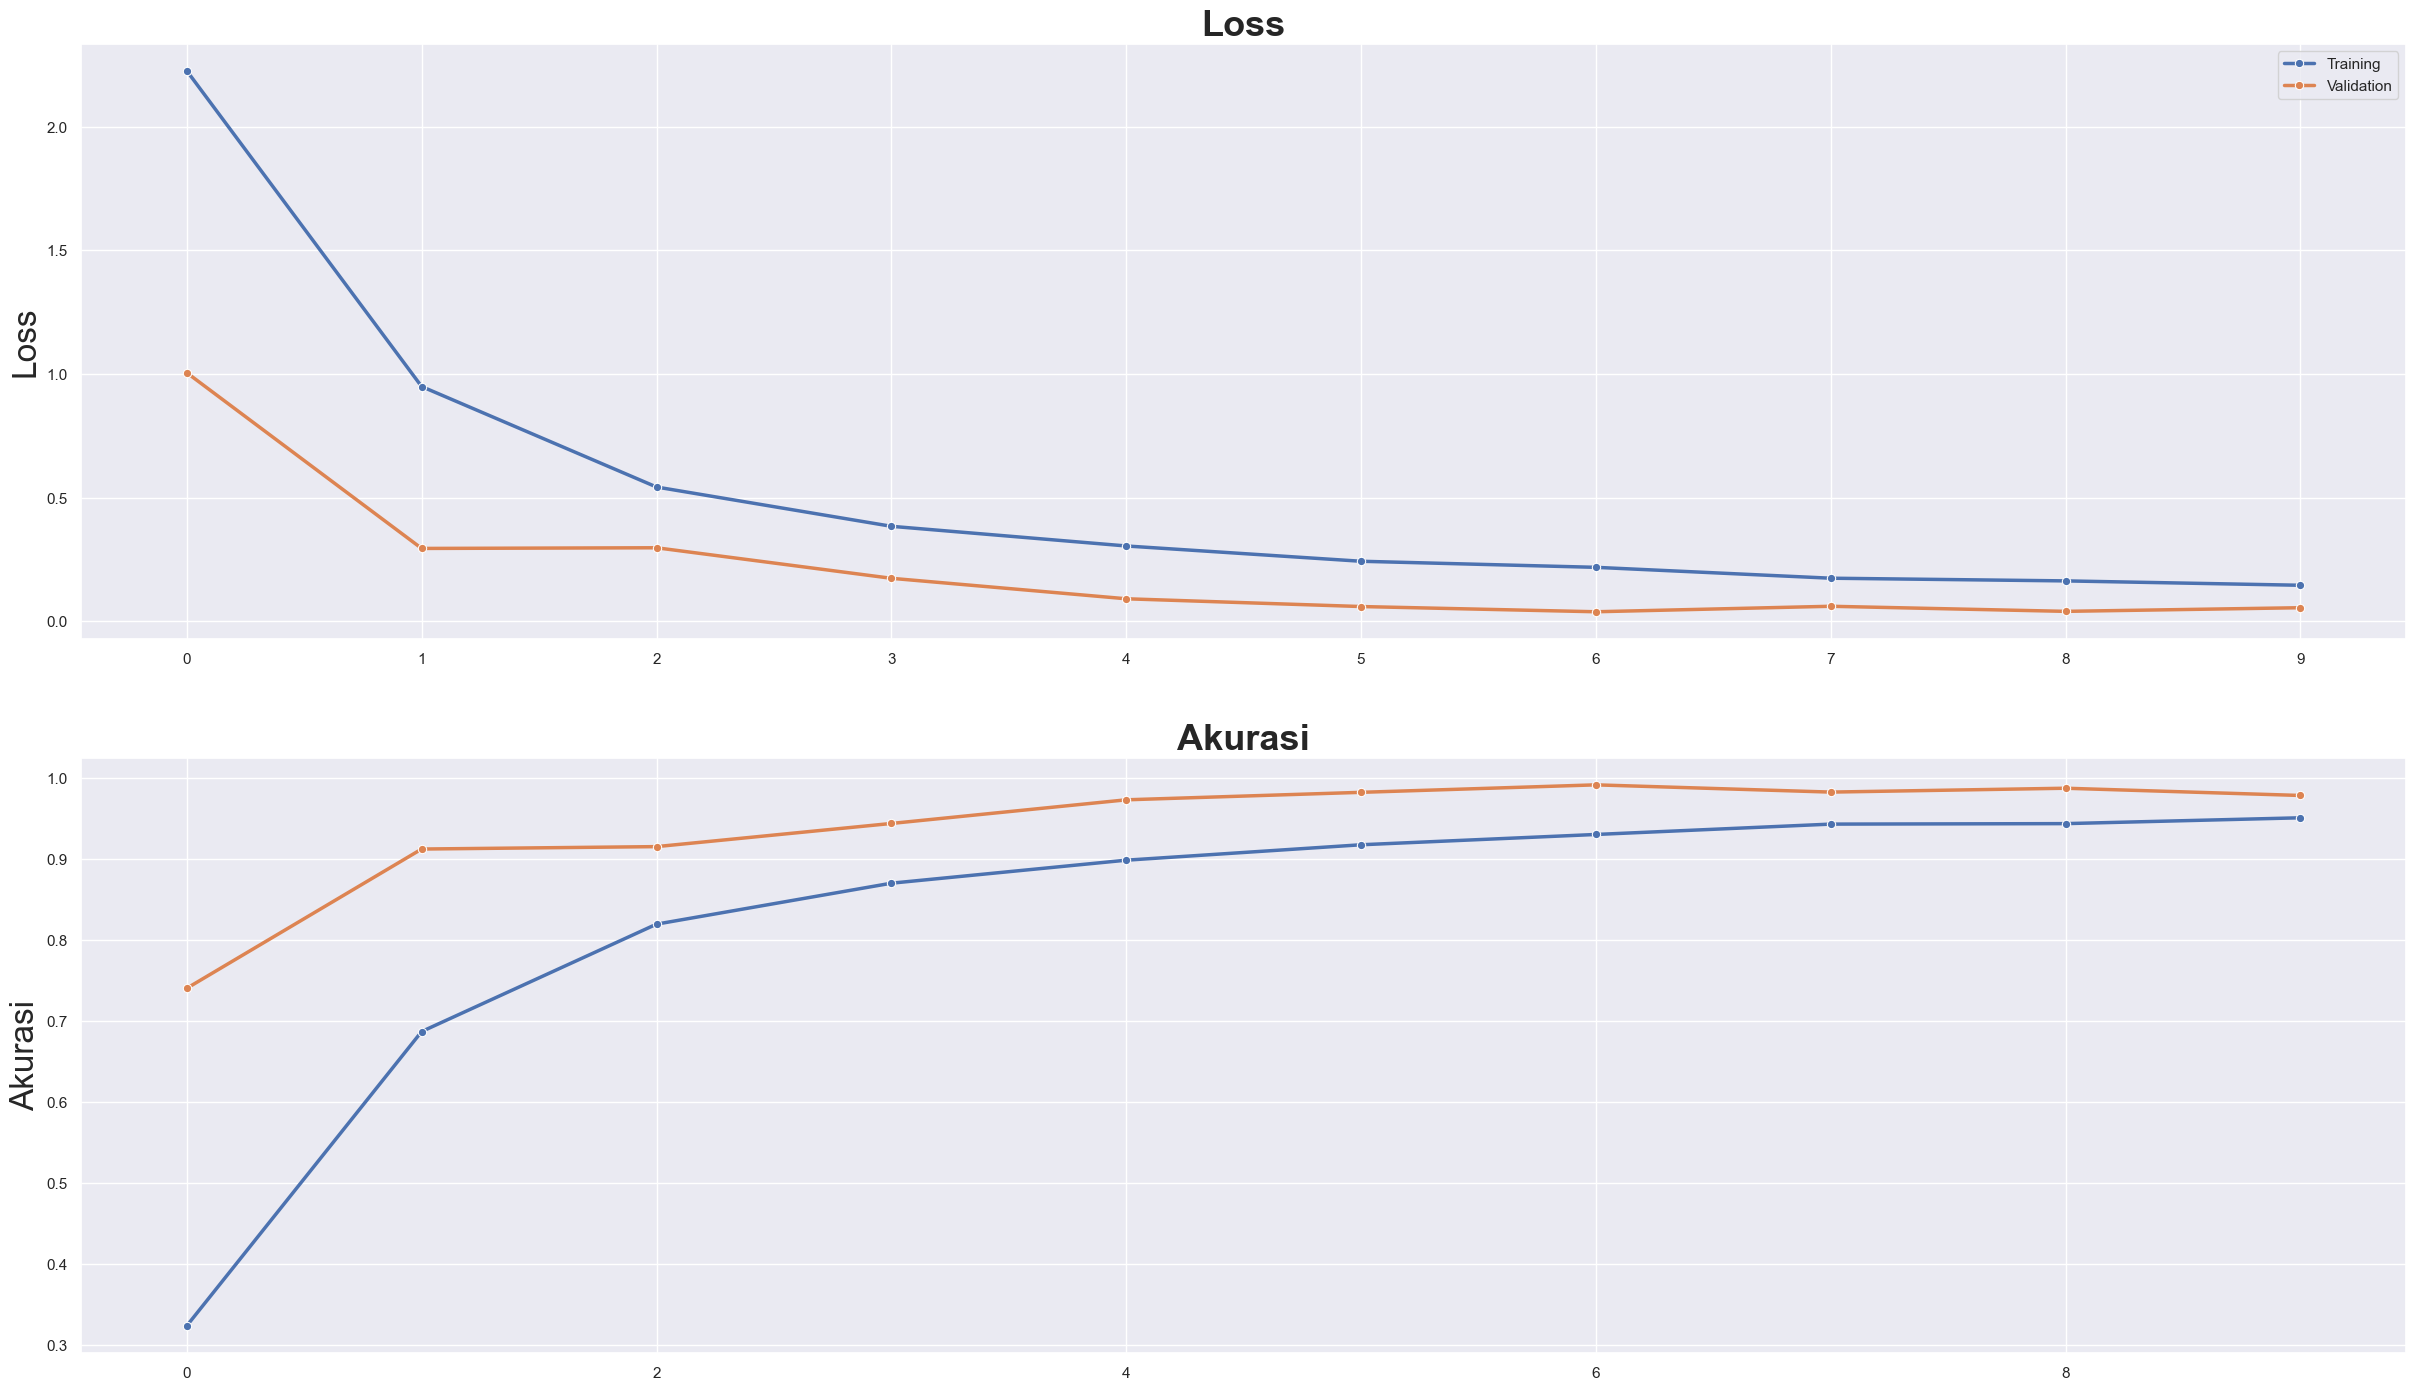

In [15]:
epoch_loss =history.history["loss"]
epoch_val_loss = history.history["val_loss"]
n_epoch = list(range(len(epoch_loss)))

epoch_akurasi = history.history["accuracy"]
epoch_val_akurasi = history.history["val_accuracy"]

plt.figure(figsize=(30, 17))

plt.subplot(2,1,1)
sns.lineplot(data=epoch_loss, linewidth=2.5, marker="o", linestyle='solid',label='Training')
sns.lineplot(data=epoch_val_loss, linewidth=2.5, marker="o", linestyle='solid',label='Validation')
plt.xticks(n_epoch)
plt.ylabel('Loss',fontsize=24)
plt.title('Loss',fontsize=26,fontweight='bold',fontfamily='arial')
plt.legend()

#Akurasi
plt.subplot(2,1,2)
sns.lineplot(data=epoch_akurasi, linewidth=2.5, marker="o", linestyle='solid')
sns.lineplot(data=epoch_val_akurasi, linewidth=2.5, marker="o", linestyle='solid')
plt.ylabel('Akurasi',fontsize=24)
plt.title('Akurasi',fontsize=26,fontweight='bold',fontfamily='arial')
plt.show()

#### Evaluasi Data Test/Validation

In [16]:
result = model.evaluate(validGenerator)

211/211 [==============================] - 26s 121ms/step - loss: 0.0423 - accuracy: 0.9887


In [17]:
print('Hasil Tes Loss: {:4f}'.format(result[0]))
print('Hasil Tes Akurasi : {:4f}'.format(result[1]))
tes_loss = result[0]
tes_akurasi = result[1]
train_akurasi = epoch_akurasi[-1]

Hasil Tes Loss: 0.042305
Hasil Tes Akurasi : 0.988694


Dari hasil evaluasi dibawah bisa terlihat jika evaluasi data test atau data validation masih mempertahankan akurasi yang tidak berbeda jauh dengan yang ada pada data training. Seharusnya tidak ada masalah jika mengklasifikasikan data/gambar yang tidak pernah bersentuhan dengan model.

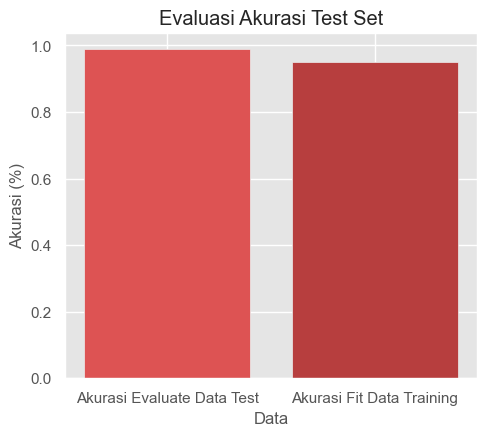

In [18]:
plt.style.use('ggplot')

label = ["Akurasi Evaluate Data Test","Akurasi Fit Data Training"]
train_acc = [tes_akurasi, train_akurasi]

fig,ax = plt.subplots(figsize=(5.5,5))

ax.bar(label,train_acc,color=['#DD5353','#B73E3E'])
ax.set_ylabel("Akurasi (%)")
ax.set_xlabel("Data")
ax.set_title("Evaluasi Akurasi Test Set")

fig.tight_layout(pad=3.0)
plt.show()

##### Tahap Klasifikasi atau Prediksi

Tahap klasifikasi pada contoh kali ini adalah kami menggunakan data gambar yang terletak pada folder test yang benar-benar tidak tersentuh oleh model. Kami ingin melihat apakah deep learning ini masih bisa mengenali buah secara akurat jika menggunakan dataset yang tidak pernah bersentuhan dengan model.

1/1 [==============================] - 0s 34ms/step
Gambar ini adalah Strawberry dengan akurasi 96.04 %


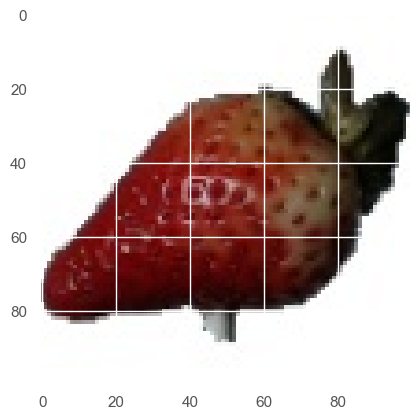

In [22]:
samplePath = pathlib.Path("fruit-recognition/test/test/0172.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1,imageWidth,imageHeight,3)
predictions = model.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("Gambar ini adalah {} dengan akurasi {:.2f} %".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))